<a href="https://colab.research.google.com/github/2004-tanu/AI-based-Innovation-and-Product-Development.io/blob/main/AI%26PD_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                          Assignment No 3
    
    Develop a sentiment analysis model to analyze customer reviews of products or services.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as ans

In [43]:
df = pd.read_csv("flipkart_product.csv",encoding='latin-1')


In [8]:
df

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Super!,Great cooler.. excellent air flow and for this...
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Awesome,Best budget 2 fit cooler. Nice cooling
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,The quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",1,Useless product,Very bad product it's a only a fan
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,Ok ok product
...,...,...,...,...,...
189869,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,Terrific,Thanks
189870,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,Terrific,Good
189871,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,Just wow!,Super
189872,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,4,Worth the money,Good


In [9]:
df.columns

Index(['ProductName', 'Price', 'Rate', 'Review', 'Summary'], dtype='object')

In [10]:
df.describe()

,ProductName,Price,Rate,Review,Summary
count,189874,189873,189873,189870,189860
unique,812,561,9,1264,98343
top,MILTON Thermosteel Flip Lid 500 ml FlaskÂ Â (P...,"â¹1,299",5,Nan,Good
freq,9278,10005,108694,20862,14175


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189874 entries, 0 to 189873
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ProductName  189874 non-null  object
 1   Price        189873 non-null  object
 2   Rate         189873 non-null  object
 3   Review       189870 non-null  object
 4   Summary      189860 non-null  object
dtypes: object(5)
memory usage: 7.2+ MB


In [12]:
df.head()

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Super!,Great cooler.. excellent air flow and for this...
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Awesome,Best budget 2 fit cooler. Nice cooling
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,The quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",1,Useless product,Very bad product it's a only a fan
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,Ok ok product


In [14]:
df.tail()

,ProductName,Price,Rate,Review,Summary
189869,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,Terrific,Thanks
189870,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,Terrific,Good
189871,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,Just wow!,Super
189872,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,4,Worth the money,Good
189873,,NaN,NaN,NaN,NaN


In [15]:
df.isnull().sum()

,0
ProductName,0
Price,1
Rate,1
Review,4
Summary,14


In [19]:
df.dropna(inplace=True)

In [20]:
df.isnull().sum()

,0
ProductName,0
Price,0
Rate,0
Review,0
Summary,0


In [21]:
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm  import LinearSVC

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [26]:
def rating_to_sentiment(Rate):

  Rate = pd.to_numeric(Rate, errors='coerce')
  if Rate <= 2:
    return "Negative"
  elif Rate == 3:
    return "Neutral"
  else:
    return "Positive"

df["Sentement"] = df["Rate"].apply(rating_to_sentiment)
print(df["Sentement"].value_counts())

Sentement
Positive    148337
Negative     25840
Neutral      15680
Name: count, dtype: int64


In [27]:
x = df["Review"]
y = df["Sentement"]

In [28]:
x

,Review
0,Super!
1,Awesome
2,Fair
3,Useless product
4,Fair
...,...
189868,Terrific
189869,Terrific
189870,Terrific
189871,Just wow!


In [29]:
y

,Sentement
0,Positive
1,Positive
2,Neutral
3,Negative
4,Neutral
...,...
189868,Positive
189869,Positive
189870,Positive
189871,Positive


In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [31]:
vectorizer = TfidfVectorizer(
    stop_words = "english",
    max_features=50000

)
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)



Logistic Regression

In [41]:
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train_vectorized,y_train)

lr_pred = lr.predict(x_test_vectorized)
lr_acc = accuracy_score(y_test, lr_pred)

In [42]:
print(lr_acc)

0.9507005161698093


Naive Bayes

In [35]:
nb = MultinomialNB()
nb.fit(x_train_vectorized,y_train)

nb_pred = nb.predict(x_test_vectorized)
nb_acc = accuracy_score(y_test, nb_pred)

In [36]:
print(nb_acc)

0.9317391762351206


Support Vector Machine (SVM)

In [37]:
svm = LinearSVC()
svm.fit(x_train_vectorized,y_train)

svm_pred = svm.predict(x_test_vectorized)
svm_acc = accuracy_score(y_test, svm_pred)

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [38]:
print(svm_acc)

0.950726851364163


In [39]:
from sklearn.metrics import accuracy_score

print("Accuracy of Models")
print("------------------")

print("Logistic Regression Accuracy:",
      accuracy_score(y_test, lr_pred))

print("Naive Bayes Accuracy:",
      accuracy_score(y_test, nb_pred))

print("SVM Accuracy:",
      accuracy_score(y_test, svm_pred))


Accuracy of Models
------------------
Logistic Regression Accuracy: 0.9507005161698093
Naive Bayes Accuracy: 0.9317391762351206
SVM Accuracy: 0.950726851364163


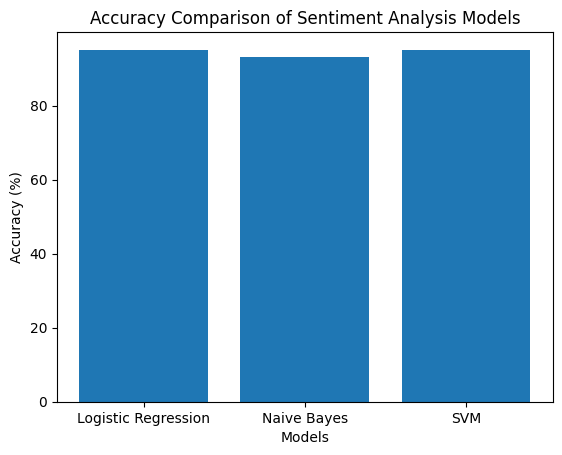

In [40]:
import matplotlib.pyplot as plt

models = ["Logistic Regression", "Naive Bayes", "SVM"]
accuracy = [lr_acc*100, nb_acc*100, svm_acc*100]

plt.figure()
plt.bar(models, accuracy)
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Comparison of Sentiment Analysis Models")
plt.show()
